## Unsupervised Learning

In [3]:
from __future__ import division
import warnings
warnings.simplefilter('ignore' )

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [4]:
#import data using drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/test/intent_classif_EN.csv"
dataset = pd.read_csv(path,sep=',')
# Dataset is now stored in a Pandas Dataframedrive

In [6]:
X=dataset['text']

In [ ]:
#Text pre-processing
"""removes punctuation, stopwords, and returns a list of the remaining words, or tokens"""
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

X_train=X

In [7]:
#Cleaning the text

import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in nopunc]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
#Vectorisation : -
print("Vectorisation..............")

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfconvert = TfidfVectorizer(analyzer=text_process,ngram_range=(1,3)).fit(X_train)

X_transformed=tfidfconvert.transform(X_train)


Vectorisation..............


In [11]:
# Clustering the training sentences with K-means technique
print("Training..............")

from sklearn.cluster import KMeans
modelkmeans = KMeans(n_clusters=7, init='k-means++', n_init=10)
modelkmeans.fit(X_transformed)

Training..............


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
def Elbow_val(X_transformed):

  Sum_of_squared_distances = []
  K = range(1,7)
  for k in K:
      km = KMeans(n_clusters=k)
      km = km.fit(X_transformed)
      Sum_of_squared_distances.append(km.inertia_)
  import matplotlib.pyplot as plt

  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()


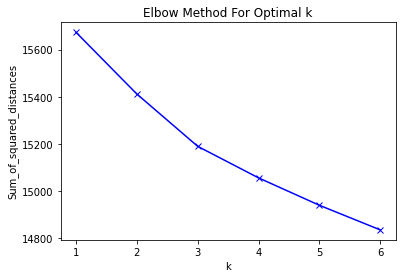

In [20]:
Sum_of_squared_distances=Elbow_val(X_transformed)